# Modeling Notebook with Resampling Methods

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pickle

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report,balanced_accuracy_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer


from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("../py")
from utils import *

from sklearn import linear_model, utils, svm
from sklearn.utils import resample
from imblearn.under_sampling import ClusterCentroids, EditedNearestNeighbours, RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pickle.load(open("../pickle/train.pickle", "rb"))
val = pickle.load(open("../pickle/val.pickle", "rb"))

In [3]:
train.head()

,tweet,target,tweet2
0,"[reject, constantly, house, threaten, rape, mo...",1,"'reject', 'constantly', 'house', 'threaten', '..."
1,"[convince, lame, nigger, liver, believe, cuz, ...",1,"'convince', 'lame', 'nigger', 'liver', 'believ..."
2,"[peace, fag, remember, best, lux, support, dro...",1,"'peace', 'fag', 'remember', 'best', 'lux', 'su..."
3,"[haha, ight, nig, calm, yoself]",1,"'haha', 'ight', 'nig', 'calm', 'yoself'"
4,"[tits, better, look, face, make, like, asian, ...",1,"'tits', 'better', 'look', 'face', 'make', 'lik..."


In [4]:
train.tweet = train.tweet.apply(lambda x: str(x)[1:-1]) 

In [5]:
train.target.value_counts()

0    17514
1     1072
Name: target, dtype: int64

In [6]:
train.head()

,tweet,target,tweet2
0,"'reject', 'constantly', 'house', 'threaten', '...",1,"'reject', 'constantly', 'house', 'threaten', '..."
1,"'convince', 'lame', 'nigger', 'liver', 'believ...",1,"'convince', 'lame', 'nigger', 'liver', 'believ..."
2,"'peace', 'fag', 'remember', 'best', 'lux', 'su...",1,"'peace', 'fag', 'remember', 'best', 'lux', 'su..."
3,"'haha', 'ight', 'nig', 'calm', 'yoself'",1,"'haha', 'ight', 'nig', 'calm', 'yoself'"
4,"'tits', 'better', 'look', 'face', 'make', 'lik...",1,"'tits', 'better', 'look', 'face', 'make', 'lik..."


In [7]:
val.head()

,tweet,target,tweet2
0,"[lbum, fotos, gaywrites, make, project, queer,...",1,"'lbum', 'fotos', 'gaywrites', 'make', 'project..."
1,"[yay, america, israel, jew, hat, muslim, trash...",1,"'yay', 'america', 'israel', 'jew', 'hat', 'mus..."
2,"[miss, ofay, friends, day, scar, recent, happe...",1,"'miss', 'ofay', 'friends', 'day', 'scar', 'rec..."
3,"[trash, darkskin, nigga, steal, damn, garbage]",1,"'trash', 'darkskin', 'nigga', 'steal', 'damn',..."
4,"[cody, call, people, nigger, hes, fuck, spaz]",1,"'cody', 'call', 'people', 'nigger', 'hes', 'fu..."


In [8]:
val.tweet = val.tweet.apply(lambda x: str(x)[1:-1]) 

In [9]:
X_tr = train.tweet
X_val = val.tweet
y_tr = train.target
y_val = val.target

In [10]:
vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_tr)
tfidf_val = vec.transform(X_val)

## Multinomial Naive Bayes

Accuracy:  0.9426957223567393
F1 Score:  0.009302325581395347
ROC-AUC:  0.7177479383492388
Recall:  0.004672897196261682
Precision:  1.0
PR-AUC:  0.17675788857212738


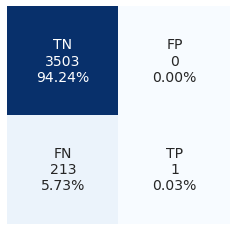

In [11]:
nb = MultinomialNB().fit(tfidf_tr, y_tr)
y_pr_nb_val = nb.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_nb_val, nb)

## Random Forest Classifier

Accuracy:  0.9416195856873822
F1 Score:  0.1685823754789272
ROC-AUC:  0.8425408394940518
Recall:  0.102803738317757
Precision:  0.46808510638297873
PR-AUC:  0.32148429943586526


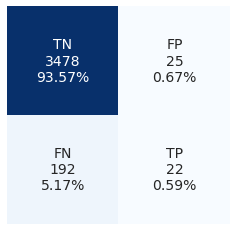

In [14]:
rf = RandomForestClassifier(n_estimators=100).fit(tfidf_tr, y_tr)
y_pr_rf_val = rf.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_rf_val, rf)

## Logistic Regression

Accuracy:  0.9443099273607748
F1 Score:  0.20077220077220076
ROC-AUC:  0.8743293465414158
Recall:  0.12149532710280374
Precision:  0.5777777777777777
PR-AUC:  0.355640424831512


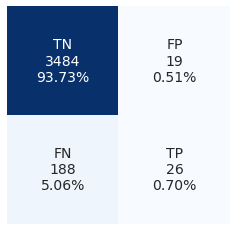

In [15]:
log = LogisticRegression().fit(tfidf_tr, y_tr)
y_pr_log_val = log.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_log_val, log)

In [16]:
svc = svm.LinearSVC(random_state=42).fit(tfidf_tr, y_tr)
y_pr_svc_val = svc.predict(tfidf_val)
get_metrics_2(tfidf_val, y_val, y_pr_svc_val, svc)

Accuracy:  0.9391982781813291
F1:  0.2709677419354839
Recall:  0.19626168224299065
Precision:  0.4375
PR-AUC:  0.32508683821796447


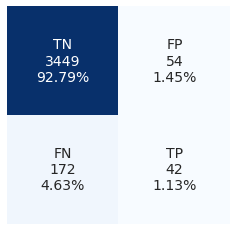

In [17]:
get_confusion(y_val, y_pr_svc_val)

Accuracy:  0.9405434490180253
F1 Score:  0.2706270627062706
ROC-AUC:  0.814550145269342
Recall:  0.19158878504672897
Precision:  0.4606741573033708
PR-AUC:  0.2974936941220006


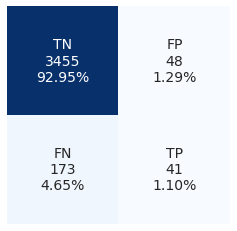

In [18]:
abc = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
    ).fit(tfidf_tr, y_tr)
y_pr_abc_val = abc.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_abc_val, abc)

Accuracy:  0.9429647565240785
F1 Score:  0.1846153846153846
ROC-AUC:  0.8386076287081035
Recall:  0.11214953271028037
Precision:  0.5217391304347826
PR-AUC:  0.3494493036003755


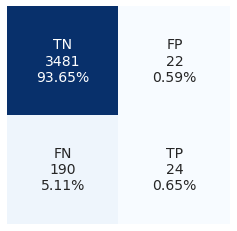

In [19]:
gbc = GradientBoostingClassifier().fit(tfidf_tr, y_tr)
y_pr_gbc_val = gbc.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_gbc_val, gbc)

In [43]:
data = {'Accuracy': [accuracy(y_val, y_pr_nb_val), 
                     accuracy(y_val, y_pr_rf_val), 
                     accuracy(y_val, y_pr_log_val), 
                     accuracy(y_val, y_pr_svc_val),
                     accuracy(y_val, y_pr_abc_val),
                     accuracy(y_val, y_pr_gbc_val)],
        'F1 Score': [f1(y_val, y_pr_nb_val), 
                     f1(y_val, y_pr_rf_val), 
                     f1(y_val, y_pr_log_val), 
                     f1(y_val, y_pr_svc_val),
                     f1(y_val, y_pr_abc_val),
                     f1(y_val, y_pr_gbc_val)],
        'Recall': [recall(y_val, y_pr_nb_val), 
                   recall(y_val, y_pr_rf_val), 
                   recall(y_val, y_pr_log_val),
                   recall(y_val, y_pr_svc_val),
                   recall(y_val, y_pr_abc_val),
                   recall(y_val, y_pr_gbc_val)],
        'Precision': [precision(y_val, y_pr_nb_val), 
                      precision(y_val, y_pr_rf_val), 
                      precision(y_val, y_pr_log_val),
                      precision(y_val, y_pr_svc_val),
                      precision(y_val, y_pr_abc_val),
                      precision(y_val, y_pr_gbc_val)],
        'ROC-AUC': [auc(tfidf_val, y_val, nb),
                    auc(tfidf_val, y_val, rf),
                    auc(tfidf_val, y_val, log),
                    auc2(tfidf_val, y_val, svc),
                    auc(tfidf_val, y_val, abc),
                    auc(tfidf_val, y_val, gbc)],
        'PR-AUC': [aps(tfidf_val, y_val, nb),
                   aps(tfidf_val, y_val, rf),
                   aps(tfidf_val, y_val, log),
                   aps2(tfidf_val, y_val, svc),
                   aps(tfidf_val, y_val, abc),
                   aps(tfidf_val, y_val, gbc)]}
metrics = pd.DataFrame(data=data, index = ['Multinomial Naive Bayes', 
                                           'Random Forest',
                                           'Logistic Regression',
                                           'Support Vector Machine', 
                                           'AdaBoost Classifier', 
                                           'Gradient Boosting Classifier'])

In [44]:
metrics.to_csv("../data/metrics.csv")
metrics

,Accuracy,F1 Score,Recall,Precision,ROC-AUC,PR-AUC
Multinomial Naive Bayes,0.942696,0.009302,0.004673,1.000000,0.717748,0.176758
Random Forest,0.941620,0.168582,0.102804,0.468085,0.842541,0.321484
Logistic Regression,0.944310,0.200772,0.121495,0.577778,0.874329,0.355640
Support Vector Machine,0.939198,0.270968,0.196262,0.437500,0.836493,0.325087
AdaBoost Classifier,0.940543,0.270627,0.191589,0.460674,0.814550,0.297494
Gradient Boosting Classifier,0.942965,0.184615,0.112150,0.521739,0.838608,0.349449


# Undersampling Methods

In [22]:
# separate minority and majority classes
majority = train[train.target==0]
minority = train[train.target==1]

#baseline counts
counter = Counter(y_tr)
print("Baseline: ", counter)

Baseline:  Counter({0: 17514, 1: 1072})


## Random Under Sampler

In [23]:
rus = RandomUnderSampler()
X_tr_rus, y_tr_rus = rus.fit_sample(tfidf_tr, y_tr)
counter_rus = Counter(y_tr_rus)
print("Random Undersampler: ", counter_rus)

Random Undersampler:  Counter({0: 1072, 1: 1072})


Accuracy:  0.7105192359429647
F1 Score:  0.24011299435028252
ROC-AUC:  0.8383895245997423
Recall:  0.794392523364486
Precision:  0.14143094841930118
PR-AUC:  0.3299757913702138


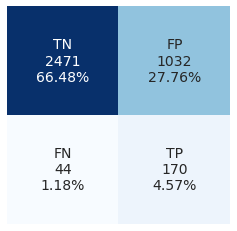

In [24]:
nb2 = MultinomialNB().fit(X_tr_rus, y_tr_rus)
y_pr_nb2_val = nb2.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_nb2_val, nb2)

Accuracy:  0.8149044928705945
F1 Score:  0.3188118811881188
ROC-AUC:  0.8591881191288643
Recall:  0.7523364485981309
Precision:  0.2022613065326633
PR-AUC:  0.31536040381485214


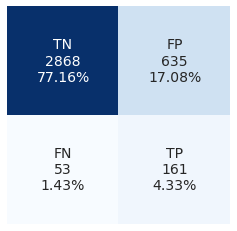

In [25]:
rf2 = RandomForestClassifier(n_estimators=100).fit(X_tr_rus, y_tr_rus)
y_pr_rf2_val = rf2.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_rf2_val, rf2)

Accuracy:  0.8240516545601292
F1 Score:  0.3326530612244898
ROC-AUC:  0.865465115348393
Recall:  0.7616822429906542
Precision:  0.21279373368146215
PR-AUC:  0.33185224787960865


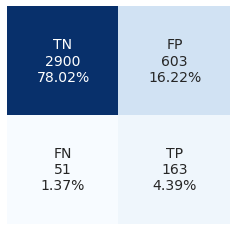

In [27]:
log2 = LogisticRegression().fit(X_tr_rus, y_tr_rus)
y_pr_log2_val = log2.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_log2_val, log2)

In [28]:
svc2 = svm.LinearSVC(random_state=42).fit(X_tr_rus, y_tr_rus)
y_pr_svc2_val = svc2.predict(tfidf_val)
get_metrics_2(tfidf_val, y_val, y_pr_svc2_val, svc2)

Accuracy:  0.7877320419693301
F1:  0.2885482416591524
Recall:  0.7476635514018691
Precision:  0.1787709497206704
PR-AUC:  0.3090017790136402


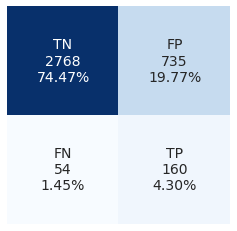

In [29]:
get_confusion(y_val, y_pr_svc2_val)

Accuracy:  0.768361581920904
F1 Score:  0.2672340425531915
ROC-AUC:  0.8143907358445764
Recall:  0.7336448598130841
Precision:  0.16337148803329865
PR-AUC:  0.26622770213988783


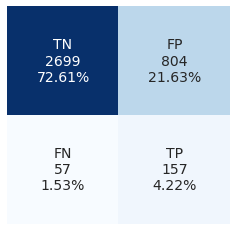

In [30]:
abc2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200).fit(X_tr_rus, y_tr_rus)
y_pr_abc2_val = abc2.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_abc2_val, abc2)

Accuracy:  0.8418079096045198
F1 Score:  0.33181818181818185
ROC-AUC:  0.8492600467956705
Recall:  0.6822429906542056
Precision:  0.21921921921921922
PR-AUC:  0.32845697519898304


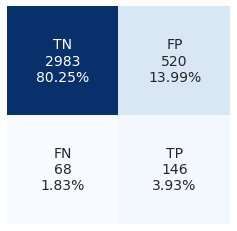

In [31]:
gbc2 = GradientBoostingClassifier().fit(X_tr_rus, y_tr_rus)
y_pr_gbc2_val = gbc2.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_gbc2_val, gbc2)

In [32]:
data2 = {'Accuracy': [accuracy(y_val, y_pr_nb2_val), 
                      accuracy(y_val, y_pr_rf2_val), 
                      accuracy(y_val, y_pr_log2_val), 
                      accuracy(y_val, y_pr_svc2_val),
                      accuracy(y_val, y_pr_abc2_val),
                      accuracy(y_val, y_pr_gbc2_val)],
        'F1 Score': [f1(y_val, y_pr_nb2_val), 
                     f1(y_val, y_pr_rf2_val), 
                     f1(y_val, y_pr_log2_val), 
                     f1(y_val, y_pr_svc2_val),
                     f1(y_val, y_pr_abc2_val),
                     f1(y_val, y_pr_gbc2_val)],
        'Recall': [recall(y_val, y_pr_nb2_val), 
                   recall(y_val, y_pr_rf2_val), 
                   recall(y_val, y_pr_log2_val),
                   recall(y_val, y_pr_svc2_val),
                   recall(y_val, y_pr_abc2_val),
                   recall(y_val, y_pr_gbc2_val)],
        'Precision': [precision(y_val, y_pr_nb2_val), 
                      precision(y_val, y_pr_rf2_val), 
                      precision(y_val, y_pr_log2_val),
                      precision(y_val, y_pr_svc2_val),
                      precision(y_val, y_pr_abc2_val),
                      precision(y_val, y_pr_gbc2_val)],
        'ROC-AUC': [auc(tfidf_val, y_val, nb2),
                    auc(tfidf_val, y_val, rf2),
                    auc(tfidf_val, y_val, log2),
                    auc2(tfidf_val, y_val, svc2),
                    auc(tfidf_val, y_val, abc2),
                    auc(tfidf_val, y_val, gbc2)],       
        'PR-AUC': [aps(tfidf_val, y_val, nb2),
                   aps(tfidf_val, y_val, rf2),
                   aps(tfidf_val, y_val, log2),
                   aps2(tfidf_val, y_val, svc2),
                   aps(tfidf_val, y_val, abc2),
                   aps(tfidf_val, y_val, gbc2)]}
metrics2 = pd.DataFrame(data=data2, index = ['RUS Multinomial Naive Bayes', 
                                             'RUS Random Forest',
                                             'RUS Logistic Regression',
                                             'RUS Support Vector Machine', 
                                             'RUS AdaBoost Classifier', 
                                             'RUS Gradient Boosting Classifier'])

In [33]:
metrics2.to_csv("../data/metrics2.csv")
metrics2

,Accuracy,F1 Score,Recall,Precision,ROC-AUC,PR-AUC
RUS Multinomial Naive Bayes,0.710519,0.240113,0.794393,0.141431,0.838390,0.329976
RUS Random Forest,0.814904,0.318812,0.752336,0.202261,0.859188,0.315360
RUS Logistic Regression,0.824052,0.332653,0.761682,0.212794,0.865465,0.331852
RUS Support Vector Machine,0.787732,0.288548,0.747664,0.178771,0.848584,0.309002
RUS AdaBoost Classifier,0.768362,0.267234,0.733645,0.163371,0.814391,0.266228
RUS Gradient Boosting Classifier,0.841808,0.331818,0.682243,0.219219,0.849260,0.328457


## Condensed Nearest Neighbour

In [60]:
cnn = CondensedNearestNeighbour(n_neighbors=3)
X_tr_cnn, y_tr_cnn = cnn.fit_resample(tfidf_tr, y_tr)
counter_cnn = Counter(y_tr_cnn)
print("Condensed Nearest Neighbors: ", counter_cnn)

Condensed Nearest Neighbors:  Counter({0: 1239, 1: 1072})


Accuracy:  0.8695184288404627
F1 Score:  0.32357043235704325
ROC-AUC:  0.7964281617091893
Recall:  0.5420560747663551
Precision:  0.23061630218687873
PR-AUC:  0.2717748232507019


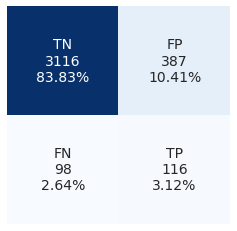

In [61]:
nb3 = MultinomialNB().fit(X_tr_cnn, y_tr_cnn)
y_pr_nb3_val = nb3.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_nb3_val, nb3)

Accuracy:  0.8870056497175142
F1 Score:  0.37125748502994016
ROC-AUC:  0.8339207248259837
Recall:  0.5794392523364486
Precision:  0.27312775330396477
PR-AUC:  0.30140100903348044


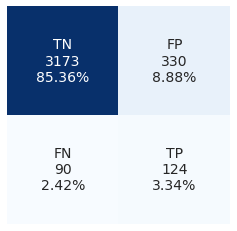

In [62]:
rf3 = RandomForestClassifier(n_estimators=100).fit(X_tr_cnn, y_tr_cnn)
y_pr_rf3_val = rf3.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_rf3_val, rf3)

Accuracy:  0.8915792305622814
F1 Score:  0.3866057838660579
ROC-AUC:  0.8610696839291289
Recall:  0.5934579439252337
Precision:  0.2866817155756208
PR-AUC:  0.3193807947425613


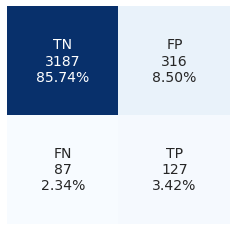

In [63]:
log3 = LogisticRegression().fit(X_tr_cnn, y_tr_cnn)
y_pr_log3_val = log3.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_log3_val, log3)

In [64]:
svc3 = svm.LinearSVC(random_state=42).fit(X_tr_cnn, y_tr_cnn)
y_pr_svc3_val = svc3.predict(tfidf_val)
get_metrics_2(tfidf_val, y_val, y_pr_svc3_val, svc3)

Accuracy:  0.8447672854452516
F1:  0.31715976331360946
Recall:  0.6261682242990654
Precision:  0.21236133122028525
PR-AUC:  0.2527248615323798


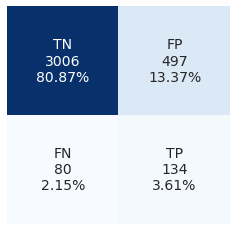

In [65]:
get_confusion(y_val, y_pr_svc3_val)

Accuracy:  0.8130212536992198
F1 Score:  0.2782969885773624
ROC-AUC:  0.7816177588769039
Recall:  0.6261682242990654
Precision:  0.17890520694259013
PR-AUC:  0.1873420130623539


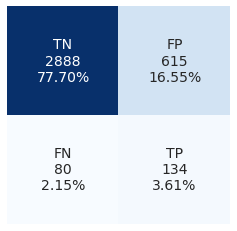

In [66]:
abc3 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
    ).fit(X_tr_cnn, y_tr_cnn)
y_pr_abc3_val = abc3.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_abc3_val, abc3)

Accuracy:  0.8907721280602636
F1 Score:  0.38109756097560976
ROC-AUC:  0.8429937223367955
Recall:  0.5841121495327103
Precision:  0.2828054298642534
PR-AUC:  0.2930645186115149


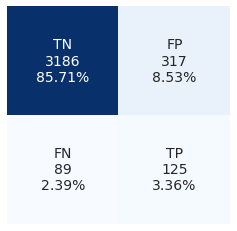

In [67]:
gbc3 = GradientBoostingClassifier().fit(X_tr_cnn, y_tr_cnn)
y_pr_gbc3_val = gbc3.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_gbc3_val, gbc3)

In [69]:
data3 = {'Accuracy': [accuracy(y_val, y_pr_nb3_val), 
                      accuracy(y_val, y_pr_rf3_val), 
                      accuracy(y_val, y_pr_log3_val), 
                      accuracy(y_val, y_pr_svc3_val),
                      accuracy(y_val, y_pr_abc3_val),
                      accuracy(y_val, y_pr_gbc3_val)],
        'F1 Score': [f1(y_val, y_pr_nb3_val), 
                     f1(y_val, y_pr_rf3_val), 
                     f1(y_val, y_pr_log3_val), 
                     f1(y_val, y_pr_svc3_val),
                     f1(y_val, y_pr_abc3_val),
                     f1(y_val, y_pr_gbc3_val)],
        'Recall': [recall(y_val, y_pr_nb3_val), 
                   recall(y_val, y_pr_rf3_val), 
                   recall(y_val, y_pr_log3_val),
                   recall(y_val, y_pr_svc3_val),
                   recall(y_val, y_pr_abc3_val),
                   recall(y_val, y_pr_gbc3_val)],
        'Precision': [precision(y_val, y_pr_nb3_val), 
                      precision(y_val, y_pr_rf3_val), 
                      precision(y_val, y_pr_log3_val),
                      precision(y_val, y_pr_svc3_val),
                      precision(y_val, y_pr_abc3_val),
                      precision(y_val, y_pr_gbc3_val)],
        'ROC-AUC': [auc(tfidf_val, y_val, nb3),
                    auc(tfidf_val, y_val, rf3),
                    auc(tfidf_val, y_val, log3),
                    auc2(tfidf_val, y_val, svc3),
                    auc(tfidf_val, y_val, abc3),
                    auc(tfidf_val, y_val, gbc3)],
        'PR-AUC': [aps(tfidf_val, y_val, nb3),
                   aps(tfidf_val, y_val, rf3),
                   aps(tfidf_val, y_val, log3),
                   aps2(tfidf_val, y_val, svc3),
                   aps(tfidf_val, y_val, abc3),
                   aps(tfidf_val, y_val, gbc3)]}
metrics3 = pd.DataFrame(data=data3, index = ['CNN Multinomial Naive Bayes', 
                                             'CNN Random Forest',
                                             'CNN Logistic Regression',
                                             'CNN Support Vector Machine', 
                                             'CNN AdaBoost Classifier', 
                                             'CNN Gradient Boosting Classifier'])

In [70]:
metrics3.to_csv("../data/metrics3.csv")
metrics3

,Accuracy,F1 Score,Recall,Precision,ROC-AUC,PR-AUC
CNN Multinomial Naive Bayes,0.869518,0.323570,0.542056,0.230616,0.796428,0.271775
CNN Random Forest,0.887006,0.371257,0.579439,0.273128,0.833921,0.301401
CNN Logistic Regression,0.891579,0.386606,0.593458,0.286682,0.861070,0.319381
CNN Support Vector Machine,0.844767,0.317160,0.626168,0.212361,0.826500,0.252725
CNN AdaBoost Classifier,0.813021,0.278297,0.626168,0.178905,0.781618,0.187342
CNN Gradient Boosting Classifier,0.890772,0.381098,0.584112,0.282805,0.842994,0.293065


## SMOTE-ENN

In [45]:
sme = SMOTEENN(sampling_strategy="minority")
X_tr_sme, y_tr_sme = sme.fit_sample(tfidf_tr, y_tr)
counter_sme = Counter(y_tr_sme)
print("SMOTE-ENN: ", counter_sme)

SMOTE-ENN:  Counter({1: 17405, 0: 15843})


Accuracy:  0.7931127253161151
F1 Score:  0.2697056030389364
ROC-AUC:  0.7977701356113985
Recall:  0.6635514018691588
Precision:  0.16924910607866508
PR-AUC:  0.29633424057510677


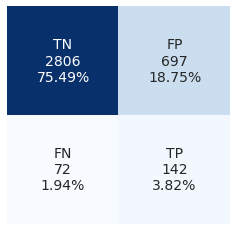

In [46]:
nb4 = MultinomialNB().fit(X_tr_sme, y_tr_sme)
y_pr_nb4_val = nb4.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_nb4_val, nb4)

Accuracy:  0.9292440139897767
F1 Score:  0.4270152505446623
ROC-AUC:  0.8651289548877997
Recall:  0.45794392523364486
Precision:  0.4
PR-AUC:  0.3279621671575653


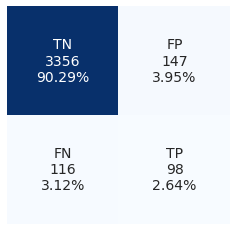

In [49]:
rf4 = RandomForestClassifier(n_estimators=100).fit(X_tr_sme, y_tr_sme)
y_pr_rf4_val = rf4.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_rf4_val, rf4)

Accuracy:  0.7931127253161151
F1 Score:  0.2697056030389364
ROC-AUC:  0.8546132687336088
Recall:  0.6635514018691588
Precision:  0.16924910607866508
PR-AUC:  0.31700602594546656


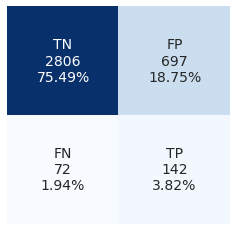

In [50]:
log4 = LogisticRegression().fit(X_tr_sme, y_tr_sme)
y_pr_log4_val = nb4.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_log4_val, log4)

In [51]:
svc4 = svm.LinearSVC(random_state=42).fit(X_tr_sme, y_tr_sme)
y_pr_svc4_val = svc4.predict(tfidf_val)
get_metrics_2(tfidf_val, y_val, y_pr_svc4_val, svc4)

Accuracy:  0.8878127522195319
F1:  0.3554868624420402
Recall:  0.5373831775700935
Precision:  0.26558891454965355
PR-AUC:  0.2941731768276217


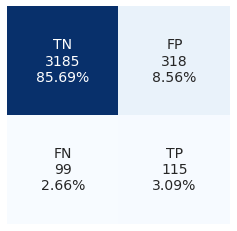

In [53]:
get_confusion(y_val, y_pr_svc4_val)

Accuracy:  0.8824320688727468
F1 Score:  0.36017569546120054
ROC-AUC:  0.8424661371694755
Recall:  0.5747663551401869
Precision:  0.2622601279317697
PR-AUC:  0.2987748891898325


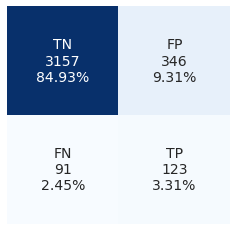

In [55]:
abc4 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
    ).fit(X_tr_sme, y_tr_sme)
y_pr_abc4_val = abc4.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_abc4_val, abc4)

Accuracy:  0.8870056497175142
F1 Score:  0.37685459940652816
ROC-AUC:  0.8492480410649351
Recall:  0.5934579439252337
Precision:  0.27608695652173915
PR-AUC:  0.32514740520327856


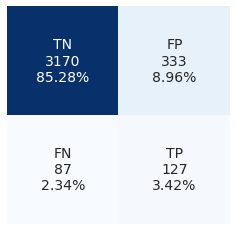

In [56]:
gbc4 = GradientBoostingClassifier().fit(X_tr_sme, y_tr_sme)
y_pr_gbc4_val = gbc4.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_gbc4_val, gbc4)

In [58]:
data4 = {'Accuracy': [accuracy(y_val, y_pr_nb4_val), 
                     accuracy(y_val, y_pr_rf4_val), 
                     accuracy(y_val, y_pr_log4_val), 
                     accuracy(y_val, y_pr_svc4_val),
                     accuracy(y_val, y_pr_abc4_val),
                     accuracy(y_val, y_pr_gbc4_val)],
        'F1 Score': [f1(y_val, y_pr_nb4_val), 
                     f1(y_val, y_pr_rf4_val), 
                     f1(y_val, y_pr_log4_val), 
                     f1(y_val, y_pr_svc4_val),
                     f1(y_val, y_pr_abc4_val),
                     f1(y_val, y_pr_gbc4_val)],
        'Recall': [recall(y_val, y_pr_nb4_val), 
                   recall(y_val, y_pr_rf4_val), 
                   recall(y_val, y_pr_log4_val),
                   recall(y_val, y_pr_svc4_val),
                   recall(y_val, y_pr_abc4_val),
                   recall(y_val, y_pr_gbc4_val)],
        'Precision': [precision(y_val, y_pr_nb4_val), 
                      precision(y_val, y_pr_rf4_val), 
                      precision(y_val, y_pr_log4_val),
                      precision(y_val, y_pr_svc4_val),
                      precision(y_val, y_pr_abc4_val),
                      precision(y_val, y_pr_gbc4_val)],
        'ROC-AUC': [auc(tfidf_val, y_val, nb4),
                    auc(tfidf_val, y_val, rf4),
                    auc(tfidf_val, y_val, log4),
                    auc2(tfidf_val, y_val, svc4),
                    auc(tfidf_val, y_val, abc4),
                    auc(tfidf_val, y_val, gbc4)],
        'PR-AUC': [aps(tfidf_val, y_val, nb4),
                   aps(tfidf_val, y_val, rf4),
                   aps(tfidf_val, y_val, log4),
                   aps2(tfidf_val, y_val, svc4),
                   aps(tfidf_val, y_val, abc4),
                   aps(tfidf_val, y_val, gbc4)]}
metrics4 = pd.DataFrame(data=data4, index = ['Sm-ENN Multinomial Naive Bayes', 
                                             'Sm-ENNR andom Forest',
                                             'Sm-ENN Logistic Regression',
                                             'Sm-ENN Support Vector Machine', 
                                             'Sm-ENN AdaBoost Classifier', 
                                             'Sm-ENN Gradient Boosting Classifier'])

In [59]:
metrics4.to_csv("../data/metrics4.csv")
metrics4

,Accuracy,F1 Score,Recall,Precision,ROC-AUC,PR-AUC
Sm-ENN Multinomial Naive Bayes,0.793113,0.269706,0.663551,0.169249,0.797770,0.296334
Sm-ENNR andom Forest,0.929244,0.427015,0.457944,0.400000,0.865129,0.327962
Sm-ENN Logistic Regression,0.793113,0.269706,0.663551,0.169249,0.854613,0.317006
Sm-ENN Support Vector Machine,0.887813,0.355487,0.537383,0.265589,0.823857,0.294173
Sm-ENN AdaBoost Classifier,0.882432,0.360176,0.574766,0.262260,0.842466,0.298775
Sm-ENN Gradient Boosting Classifier,0.887006,0.376855,0.593458,0.276087,0.849248,0.325147
